In [7]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt

sa=9
%matplotlib inline

### Ejercicio

Use el metodo dbscan aplicando el algoritmo en diferentes datasets

In [17]:
dfcan = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
dfcan.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


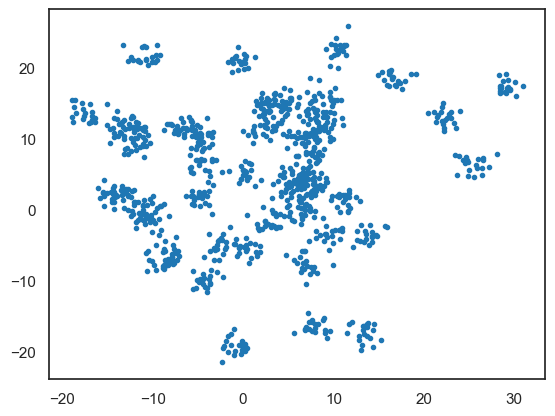

In [18]:
plt.scatter(dfcan['x'], dfcan['y'], s=sa)
plt.show()

In [294]:
clusters= DBSCAN(eps=2, min_samples=10)
clusters.fit(dfcan)
et=clusters.labels_
print(f'Grupos encontrados {len(set(clusters.labels_)- set([-1]))} grupos y {(clusters.labels_==-1).sum()} puntos de ruido.') 

Grupos encontrados 15 grupos y 3 puntos de ruido.


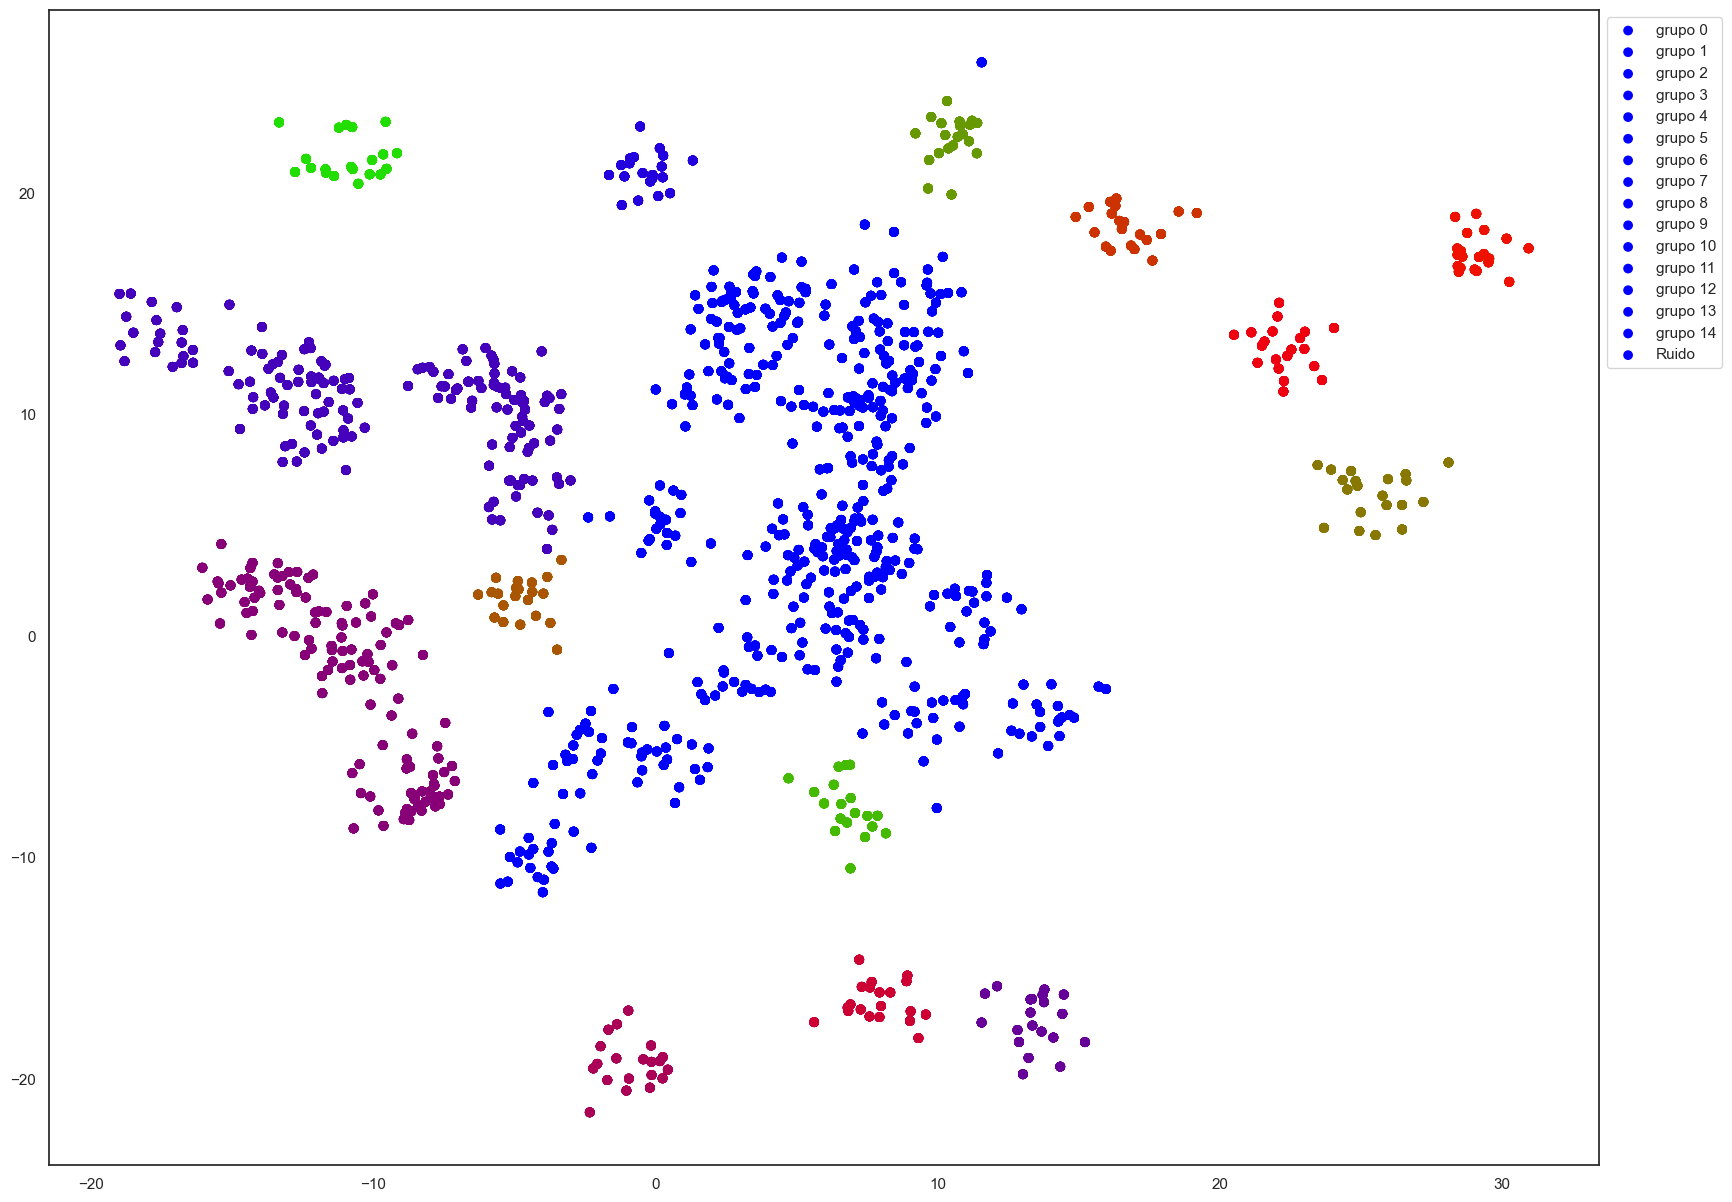

In [314]:
plt.rcParams['figure.figsize'] = (20,15)
etiquetas= set(et)
neti=len(etiquetas)
n_clusters = len(set(et)) - (1 if -1 in et else 0)
cmap=plt.cm.get_cmap('brg',neti)
for e in etiquetas:
    plt.scatter(dfcan['x'],dfcan['y'], c=cmap(et)  , label=f'grupo {e}' if e>=0 else 'Ruido')
    plt.legend(bbox_to_anchor=[1,1])
plt.show()

In [132]:
#print(clusters.labels_)

In [302]:
ruido=np.where(et==-1)[0]
print(ruido)

[ 24 198 738]


In [303]:
porcen=len(ruido)/len(et)

In [305]:
print(porcen*100)

0.3
